# 基本设置

In [111]:
import os
from gensim import corpora, models, similarities

import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

import pre

In [ ]:
def fig_heatmap(data):
    fig, ax = plt.subplots(figsize=(22, 15))
    cmap = sns.diverging_palette(220, 20, n=20)
    sns.heatmap(data, cmap = cmap,
                annot = True, annot_kws={'size':8, 'weight':'bold', 'color':'blue'}, 
                cbar = True, cbar_kws ={'orientation':'vertical',
                                        'pad':0.005, 'fraction':0.45}, 
                vmax = 1, vmin = -1, linewidths=.5, fmt="0.2f")
    plt.yticks(fontsize = 15)
    plt.xticks(fontsize = 15)

In [8]:
def desc_data(data):
    print('- 1 - field_name: field_value --')
    print(data.iloc[0, :])
    data = pd.DataFrame(data)
    print()
    print('- 2 - field number --')
    print(data.shape[1])
    print()
    print('- 3 - field name --')
    print(data.columns) 

# 导入数据

## 大量数据

In [9]:
data = pd.read_excel('data/similarity_data.xlsx')
desc_data(data)

- 1 - field_name: field_value --
id                                                  1
site_id                                             0
site_name                                          微博
group_id                                            4
url             http://weibo.com/3978363730/FxYbSAEQx
urlhash                                     621144020
title                                            转发微博
author                                       春暖花jiu开了
click                                               0
reply                                               0
publishtime                        12/3/2017 20:01:24
keywords                保监_保监会_保监局_中保监_保监分局_保险监督管理委员会
gathertime                         12/9/2017 11:49:36
gather_id                                           0
txt_file                                          NaN
inserttime                                 1512791376
flag                                                0
repeat_count                                     

In [10]:
data_set = data[['id', 'title', 'content']]
data_set.head()

,id,title,content
0,1,转发微博,转发微博
1,2,转发微博,转发微博
2,3,互联网有没有形成垄断了？有没有啊有没有？,互联网有没有形成垄断了？有没有啊有没有？
3,4,以前跨行转账收1%，现在寡头收千分之一，我应该支持谁？,以前跨行转账收1%，现在寡头收千分之一，我应该支持谁？
4,5,转发微博,转发微博


In [ ]:
# 随机分割数据
# from sklearn.model_selection import train_test_split
# train_X,test_X,train_y,test_y = train_test_split(X,y,test_size=0.2,random_state=17) 


## 小量数据

In [137]:
data = pd.read_excel('data/similarity_select.xlsx')
data

,id,content,title,author
0,1,来源：人民币交易与研究\n人民银行会同银监会、证监会、保监会、外汇局等部门于11月17 日发...,10银行联名上书:资管新规可能引发系统性金融风险,网易
1,2,来源：人民币交易与研究\n人民银行会同银监会、证监会、保监会、外汇局等部门于11月17 日发...,10银行联名上书:资管新规可能引发系统性金融风险,网易
2,3,新华社北京11月28日电（记者罗沙）最高人民法院、公安部、司法部、保监会28日联合召开视...,14省市开展交通事故纠纷“网上数据一体化处理”试点,新浪新闻
3,11,"11月24日,中国保监会官方网站公布了2017年保险公司服务评价评级结果,在参评的59家人身...",新华保险再次荣获保监会服务评价AA 评级---三湘都市报数字报刊,三湘都市报
4,12,"11月24日,保监会官方网站公布了2017年保险公司服务评价评级结果,在参评的59家人身险公...",新华保险再次荣获保监会服务评价AA评级,新浪
5,13,"(通讯员 路珂真) 2017年11月24日,中国保监会官方网站公布了2017年保险公司服务评...",新华保险再次荣获保监会服务评价AA 评级,胶东在线
6,21,近年来，一些保险机构激进投资，导致业务快进快出、流动性岌岌可危，不断积累的流动性风险。1...,保监会称重塑严监管要“长牙齿”,红商网
7,22,保监会喊话强监管：须“长牙齿”2017年11月23日 11点27分 来源：北京商报 ...,保监会喊话强监管:须“长牙齿”,金融网
8,31,11月28日，保监会再次连发三张监管函给永安财险、泰山财险和昆仑健康。\n\n而截止11月3...,保监会下发36张监管函，哪些公司？哪些原因？从严监管还在继续……,搜狐财经
9,32,保监会下发36张监管函 20张涉及公司治理\n大秦财经保险一哥2017-12-01 09:3...,保监会下发36张监管函 20张涉及公司治理,腾讯网


# 预处理

In [38]:
data_content = data['content'].tolist()
data_list = pre.handle_contents([d for d in data_content]) # 数据结构：['word word']
len(data_list)

25

In [122]:
print(data_list)

['来源 人民币 交易 研究 n 人民银行 会同 银监会 证监会 保监会 外汇局 部门 月 日 发布 关于 规范 金融机构 资产管理 业务 指导 意见 征求意见 稿 以下 简称 指导 意见 n 为 全面 评估 指导 意见 对 股份制银行 资产管理 业务 金融市场 发展 带来 影响 提出 合理 反馈 意见 供 监管部门 参考 十家 股份制银行 根据 银行业 协会 安排 月 日 上海 召开 股份制银行 同业 研讨会 会议 共 达成 以下 三项 意见 n 十家 股份制银行 为 招商银行 浦发银行 中信银行 兴业银行 光大银行 民生银行 平安银行 华夏银行 广发银行 浙商银行 信息 来自 微信 交流 群 未获 相关 机构 证实 n n 参会 银行 一致 认为 央行 五 部门 制定 指导 意见 具有 重要 积极意义 有利于 防范 业务 风险 促进 业务 健康 发展 保护 投资者 利益 强化 国家 宏观调控 更好 服务 实体 经济 n 参会 银行 一致 认为 当前 资产管理 行业 优化 社会 融资 结构 促进 金融市场 深化 增加 居民 财产性 收入 支持 实体 经济 发展 方面 发挥 积极 作用 但 业务 规范 发展 方面 也 存在 一些 不容忽视 问题 n 此 背景 下 央行 五 部门 制定 指导 意见 具有 重要 积极意义 指导 意见 正式 发布 实施 将 有利于 统一 同类 资管 产品 监管 标准 消除 监管 套利 防范 资管 业务 风险 加强 投资者 利益 保护 为 资管 业务 创造 公平 规范 经营 环境 促进 资管 业务 回归 受人之托 代客 理财 业务 本源 并 明确 资管 资金 流动 链条 为 国家 宏观调控 宏观 审慎 管理 金融 强 监管 提供 有力 信息 支持 有效 防控 金融风险 更好 服务 实体 经济 n n 参会 银行 认为 按 指导 意见 征求意见 稿 现有 部分 条款 实施 后 将 对 金融市场 影响 较大 降低 对 实体 经济 支持 力度 如果 局部 调整 将 减弱 负面影响 且 更 利于 构建 公平 市场化 竞争 环境 n 一 部分 条款 对 金融市场 影响 较大 可能 引发 系统性 金融风险 n 一是 大量 未 到期 理财 资产 将 面临 无 产品 续接 困境 资产 处置 将 加剧 金融市场 波动 n 银行理财 业务 多年 发展 积累 近

In [40]:
data_lists = [l.split(' ') for l in data_list] # 数据结构：[['word', 'word']]
len(data_lists)

25

In [56]:
print(data_lists)

[['来源', '人民币', '交易', '研究', 'n', '人民银行', '会同', '银监会', '证监会', '保监会', '外汇局', '部门', '月', '日', '发布', '关于', '规范', '金融机构', '资产管理', '业务', '指导', '意见', '征求意见', '稿', '以下', '简称', '指导', '意见', 'n', '为', '全面', '评估', '指导', '意见', '对', '股份制银行', '资产管理', '业务', '金融市场', '发展', '带来', '影响', '提出', '合理', '反馈', '意见', '供', '监管部门', '参考', '十家', '股份制银行', '根据', '银行业', '协会', '安排', '月', '日', '上海', '召开', '股份制银行', '同业', '研讨会', '会议', '共', '达成', '以下', '三项', '意见', 'n', '十家', '股份制银行', '为', '招商银行', '浦发银行', '中信银行', '兴业银行', '光大银行', '民生银行', '平安银行', '华夏银行', '广发银行', '浙商银行', '信息', '来自', '微信', '交流', '群', '未获', '相关', '机构', '证实', 'n', 'n', '参会', '银行', '一致', '认为', '央行', '五', '部门', '制定', '指导', '意见', '具有', '重要', '积极意义', '有利于', '防范', '业务', '风险', '促进', '业务', '健康', '发展', '保护', '投资者', '利益', '强化', '国家', '宏观调控', '更好', '服务', '实体', '经济', 'n', '参会', '银行', '一致', '认为', '当前', '资产管理', '行业', '优化', '社会', '融资', '结构', '促进', '金融市场', '深化', '增加', '居民', '财产性', '收入', '支持', '实体', '经济', '发展', '方面', '发挥', '积极', '作用', '但', '业务', '规范', '发展', '方面', '也', '存在', '一些', 

## 计算词频，并去除词频小于n的词

In [125]:
from collections import defaultdict

frequency = defaultdict(int)
for text in data_lists:
    for token in text:
        frequency[token] += 1

precessed_corpus = [[token for token in text if frequency[token] > 0] for text in data_lists]   
# 数据结构：[['word', 'word']] 等同 data_lists
print('type(frequency): ', type(frequency))

type(frequency):  <class 'collections.defaultdict'>


In [126]:
print(precessed_corpus)

[['来源', '人民币', '交易', '研究', 'n', '人民银行', '会同', '银监会', '证监会', '保监会', '外汇局', '部门', '月', '日', '发布', '关于', '规范', '金融机构', '资产管理', '业务', '指导', '意见', '征求意见', '稿', '以下', '简称', '指导', '意见', 'n', '为', '全面', '评估', '指导', '意见', '对', '股份制银行', '资产管理', '业务', '金融市场', '发展', '带来', '影响', '提出', '合理', '反馈', '意见', '供', '监管部门', '参考', '十家', '股份制银行', '根据', '银行业', '协会', '安排', '月', '日', '上海', '召开', '股份制银行', '同业', '研讨会', '会议', '共', '达成', '以下', '三项', '意见', 'n', '十家', '股份制银行', '为', '招商银行', '浦发银行', '中信银行', '兴业银行', '光大银行', '民生银行', '平安银行', '华夏银行', '广发银行', '浙商银行', '信息', '来自', '微信', '交流', '群', '未获', '相关', '机构', '证实', 'n', 'n', '参会', '银行', '一致', '认为', '央行', '五', '部门', '制定', '指导', '意见', '具有', '重要', '积极意义', '有利于', '防范', '业务', '风险', '促进', '业务', '健康', '发展', '保护', '投资者', '利益', '强化', '国家', '宏观调控', '更好', '服务', '实体', '经济', 'n', '参会', '银行', '一致', '认为', '当前', '资产管理', '行业', '优化', '社会', '融资', '结构', '促进', '金融市场', '深化', '增加', '居民', '财产性', '收入', '支持', '实体', '经济', '发展', '方面', '发挥', '积极', '作用', '但', '业务', '规范', '发展', '方面', '也', '存在', '一些', 

In [55]:
print(frequency)

defaultdict(<class 'int'>, {'来源': 5, '人民币': 2, '交易': 21, '研究': 2, 'n': 267, '人民银行': 6, '会同': 4, '银监会': 12, '证监会': 8, '保监会': 55, '外汇局': 2, '部门': 21, '月': 45, '日': 32, '发布': 24, '关于': 6, '规范': 6, '金融机构': 44, '资产管理': 50, '业务': 84, '指导': 97, '意见': 102, '征求意见': 6, '稿': 6, '以下': 7, '简称': 5, '为': 75, '全面': 4, '评估': 6, '对': 90, '股份制银行': 8, '金融市场': 21, '发展': 32, '带来': 6, '影响': 24, '提出': 4, '合理': 6, '反馈': 2, '供': 2, '监管部门': 3, '参考': 4, '十家': 4, '根据': 34, '银行业': 6, '协会': 4, '安排': 6, '上海': 5, '召开': 4, '同业': 2, '研讨会': 2, '会议': 3, '共': 3, '达成': 4, '三项': 2, '招商银行': 2, '浦发银行': 2, '中信银行': 2, '兴业银行': 2, '光大银行': 2, '民生银行': 2, '平安银行': 2, '华夏银行': 2, '广发银行': 2, '浙商银行': 2, '信息': 14, '来自': 4, '微信': 4, '交流': 2, '群': 2, '未获': 2, '相关': 21, '机构': 46, '证实': 2, '参会': 8, '银行': 58, '一致': 10, '认为': 8, '央行': 4, '五': 6, '制定': 12, '具有': 34, '重要': 22, '积极意义': 4, '有利于': 8, '防范': 8, '风险': 81, '促进': 8, '健康': 5, '保护': 4, '投资者': 60, '利益': 8, '强化': 7, '国家': 19, '宏观调控': 4, '更好': 8, '服务': 27, '实体': 24, '经济': 26, '当前': 2, '行业': 20

## 建立字典
- 在正式处理之前，我们想对语料中的每一个单词关联一个唯一的ID。
- 这可以用gensim.corpora.Dictionary来实现。
- 这个字典定义了我们要处理的所有单词表。

In [68]:
#dictionary = corpora.Dictionary(textTest,prune_at=2000000)
#for key in dictionary.iterkeys():
#    print key,dictionary.get(key),dictionary.dfs[key]

dictionary = corpora.Dictionary(precessed_corpus)
print(dictionary)

Dictionary(1933 unique tokens: ['', 'CAS', 'FOF', 'IFRS', 'MOM']...)


# 向量化

## 词袋模型（bag-of-words）
- 在词袋模型中，每篇文档表示被表示成一个向量，代表字典中每个词出现的次数。
> - 例如，给定一个包含[‘coffee’,’milk’,’sugar’,’spoon’]的字典，一个包含[‘coffee milk coffee’]字符串的文档可以表示成向量[2,1,0,0]。
- 向量各个元素的位置和字典的顺序相对应，向量的长度就是字典的长度。
- 词袋模型的一个重要特点是，它完全忽略的单词在句子中出现的顺序，这也就是“词袋”这个名字的由来。

In [129]:
print(dictionary.token2id)

{'': 0, 'CAS': 1, 'FOF': 2, 'IFRS': 3, 'MOM': 4, 'PPN': 5, 'SPV': 6, 'n': 7, '一': 8, '一个': 9, '一些': 10, '一刀切': 11, '一定': 12, '一层': 13, '一带': 14, '一年': 15, '一年期': 16, '一方面': 17, '一旦': 18, '一是': 19, '一次': 20, '一段': 21, '一种': 22, '一类': 23, '一致': 24, '一行三会': 25, '一路': 26, '一蹴而就': 27, '七': 28, '七成': 29, '七是': 30, '万亿': 31, '万亿元': 32, '三': 33, '三会': 34, '三季度': 35, '三年': 36, '三是': 37, '三项': 38, '上': 39, '上升': 40, '上市公司': 41, '上海': 42, '上行': 43, '上述': 44, '上限': 45, '下': 46, '下跌': 47, '下降': 48, '不一': 49, '不利于': 50, '不到': 51, '不同': 52, '不容忽视': 53, '不得': 54, '不断': 55, '不是': 56, '不管': 57, '不能': 58, '不论是': 59, '不足': 60, '不需': 61, '不高': 62, '专业': 63, '且': 64, '业务': 65, '业绩': 66, '两个': 67, '两层': 68, '两者': 69, '严格': 70, '严格执行': 71, '严重': 72, '中': 73, '中信': 74, '中信登': 75, '中信银行': 76, '中债登': 77, '中国': 78, '中国银行业': 79, '中均': 80, '中心': 81, '中性': 82, '中证报': 83, '为': 84, '为主': 85, '为准': 86, '为此': 87, '主体': 88, '主体资格': 89, '主权': 90, '主流': 91, '主要': 92, '举措': 93, '久期': 94, '之前': 95, '之外': 96, '之间': 97, '九': 9

In [77]:
new_doc = "截止目前为止，托管的房地产是保险公司无法舍弃的战略性方向。宏观调控的安排，其基础在存续期的委托仍会实施。"
new_doc_pre = pre.handle_contents([new_doc])
print(new_doc_pre)
new_vec = dictionary.doc2bow(new_doc_pre[0].split(' '))
new_vec
# 列表中每个元组中，第一个元素表示字典中单词的ID，第二个表示在这个句子中这个单词出现的次数。
# 由于任何给定的句子只会包含字典中一个单词，其他没有包含的隐含地表示为0。

['截止 目前为止 托管 房地产 保险公司 无法 舍弃 战略性 方向 宏观调控 安排 其 基础 存续期 委托 仍会 实施 ']


[(0, 1),
 (243, 1),
 (409, 1),
 (444, 1),
 (448, 1),
 (450, 1),
 (454, 1),
 (457, 1),
 (568, 1),
 (569, 1),
 (571, 1),
 (575, 1),
 (650, 1),
 (657, 1),
 (1152, 1)]

In [71]:
# 词袋模型
bow_corpus = [dictionary.doc2bow(text) for text in precessed_corpus]
print(bow_corpus)

[[(0, 1), (1, 2), (2, 4), (3, 3), (4, 2), (5, 1), (6, 1), (7, 128), (8, 4), (9, 1), (10, 2), (11, 1), (12, 8), (13, 5), (14, 1), (15, 2), (16, 1), (17, 2), (18, 1), (19, 15), (20, 1), (21, 1), (22, 1), (23, 1), (24, 5), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 8), (32, 3), (33, 5), (34, 1), (35, 1), (36, 1), (37, 8), (38, 1), (39, 15), (40, 2), (41, 2), (42, 1), (43, 1), (44, 3), (45, 1), (46, 10), (47, 1), (48, 3), (49, 1), (50, 7), (51, 1), (52, 4), (53, 1), (54, 9), (55, 1), (56, 1), (57, 1), (58, 4), (59, 1), (60, 1), (61, 1), (62, 1), (63, 3), (64, 9), (65, 26), (66, 12), (67, 1), (68, 1), (69, 1), (70, 6), (71, 1), (72, 1), (73, 9), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 3), (82, 1), (83, 1), (84, 30), (85, 2), (86, 1), (87, 1), (88, 9), (89, 1), (90, 1), (91, 1), (92, 4), (93, 1), (94, 5), (95, 3), (96, 1), (97, 1), (98, 1), (99, 15), (100, 1), (101, 1), (102, 4), (103, 14), (104, 1), (105, 2), (106, 2), (107, 3), (108, 2), (109, 8)

## 采用lsi进行向量化
- 流程：
> - 1 将各文档分词，从字符串转化为单词列表
> - 2 统计各文档单词，生成词典(dictionary)
> - 3 利用词典将文档转化成词频表示的向量，即指向量中的各值对应于词典中对应位置单词在该文档中出现次数
> - 4 再进行进一步处理，将词频表示的向量转化成tf-idf表示的向量
> - 5 由tf-idf表示的向量转化成lsi表示的向量

## word2vec 词向量化
- 可用于比较词相似度，寻找对应关系，词聚类

# 模型
> 此外，还有Random Projections, Hierarchical Dirichlet Process等模型
- 指的是把文档转化成另一个。
- 在gensim中，文档用向量来表示，所以模型可以认为是在两个向量空间进行转换。
- 这个转换是从语料训练集中学习出来的。

## tf-idf模型
- tf-idf模型把词袋表达的向量转换到另一个向量空间，这个向量空间中，词频是根据语料中每个词的相对稀有程度（relative rarity）进行加权处理的。

In [80]:
# 一条新文本
tfidf_model = models.TfidfModel(bow_corpus)
string_tfidf = tfidf[new_vec]
print(string_tfidf)
# tfidf返回了一组元组。元组中第一个元素表示ID，第二个表示tf-idf权重。

[(243, 0.30356894210713053), (409, 0.2548358312849821), (444, 0.30356894210713053), (448, 0.30356894210713053), (450, 0.30356894210713053), (454, 0.30356894210713053), (457, 0.22025913889398607), (568, 0.30356894210713053), (569, 0.22025913889398607), (571, 0.30356894210713053), (575, 0.30356894210713053), (650, 0.22025913889398607), (657, 0.22025913889398607), (1152, 0.06139645862484468)]


In [84]:
# 将整个corpus转为tf-idf格式
# tfidf_model = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf_model[bow_corpus]
#print(bow_corpus)
print(list(corpus_tfidf))

[[(1, 0.007743111088183102), (2, 0.015486222176366204), (3, 0.011614666632274652), (4, 0.007743111088183102), (5, 0.003871555544091551), (6, 0.003871555544091551), (7, 0.3595605729741482), (8, 0.01123626790544213), (9, 0.003250039574523975), (10, 0.005618133952721065), (11, 0.003871555544091551), (12, 0.02247253581088426), (13, 0.010937755033964786), (14, 0.003871555544091551), (15, 0.007743111088183102), (16, 0.003871555544091551), (17, 0.005618133952721065), (18, 0.003871555544091551), (19, 0.05807333316137326), (20, 0.003871555544091551), (21, 0.003871555544091551), (22, 0.003871555544091551), (23, 0.003871555544091551), (24, 0.019357777720457752), (25, 0.003871555544091551), (26, 0.003871555544091551), (27, 0.003871555544091551), (28, 0.003871555544091551), (29, 0.003871555544091551), (30, 0.003871555544091551), (31, 0.030972444352732408), (32, 0.009750118723571923), (33, 0.014045334881802663), (34, 0.002187551006792957), (35, 0.002187551006792957), (36, 0.003871555544091551), (37,

## LSI模型

In [130]:
# 转化为lsi模型, 可用作聚类或分类
lsi_model = models.LsiModel(corpus_tfidf, id2word=dictionary, num_topics=5)
corpus_lsi = lsi_model[corpus_tfidf]
nodes = list(corpus_lsi)
# pprint(nodes)
lsi_model.print_topics(5) # 打印各topic的含义

[(0,
  '0.632*"评级" + 0.289*"获得" + 0.277*"AA" + 0.263*"家" + 0.219*"评价" + 0.193*"参评" + 0.193*"A" + 0.193*"官方网站" + 0.174*"结果" + 0.158*"荣获"'),
 (1,
  '-0.273*"监管函" + -0.240*"宁波" + -0.232*"监管" + -0.183*"中衡" + -0.183*"公估" + -0.162*"张" + -0.158*"产品" + -0.151*"内地" + -0.142*"分公司" + -0.139*"问题"'),
 (2,
  '0.486*"宁波" + 0.375*"公估" + 0.375*"中衡" + 0.290*"分公司" + -0.147*"监管函" + 0.140*"行政处罚" + 0.135*"昨日" + 0.135*"有限公司" + 0.135*"股份" + 0.135*"决定书"'),
 (3,
  '-0.340*"内地" + -0.259*"保费" + -0.233*"新造" + 0.221*"监管函" + -0.180*"香港" + -0.172*"保单" + -0.165*"访客" + -0.150*"亿港元" + -0.143*"三季度" + 0.140*"监管"'),
 (4,
  '0.327*"n" + 0.320*"资产" + 0.302*"产品" + 0.271*"投资" + 0.190*"意见" + 0.159*"指导" + -0.154*"监管函" + 0.145*"基金" + 0.138*"银行理财" + 0.115*"非标"')]

In [ ]:
# lsi_model.save('/tmp/model.lsi') # same for tfidf, lda, ...
# lsi_model = models.LsiModel.load('/tmp/model.lsi')

## LDA模型

In [87]:
def Show2dCorpora(corpus):
    nodes = list(corpus)
    ax0 = [x[0][1] for x in nodes] # 绘制各个doc代表的点
    ax1 = [x[1][1] for x in nodes]
    # print(ax0)
    # print(ax1)
    plt.plot(ax0,ax1,'o')
    plt.show()

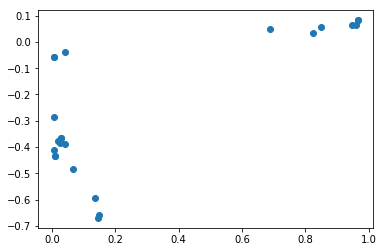

In [133]:
lda_model = models.LdaModel(corpus_tfidf, id2word=dictionary, num_topics=3)
corpus_lda = lda_model[corpus_tfidf]
Show2dCorpora(corpus_lsi)
# nodes = list(corpus_lda)
# pprint(list(corpus_lda))

# 计算相似性
- 与向量的相似度计算方式一样，采用余弦方法计算得到。
- 一般来讲，使用lsi模型得到的向量进行计算效果比较好。

In [89]:
corpus_simi_matrix = similarities.MatrixSimilarity(corpus_lsi)
# 计算一个新的文本与既有文本的相关度
#test_text = "Human computer interaction".split()
#test_bow = dictionary.doc2bow(test_text)
test_bow = new_vec
test_tfidf = tfidf_model[test_bow]
test_lsi = lsi_model[test_tfidf]
test_simi = corpus_simi_matrix[test_lsi]
print(list(enumerate(test_simi)))

[(0, 0.9767626), (1, 0.9767626), (2, 0.98803616), (3, 0.20875324), (4, 0.2260465), (5, 0.22019875), (6, 0.9818978), (7, 0.9874716), (8, 0.9971755), (9, 0.99658877), (10, 0.9974132), (11, 0.8688446), (12, 0.98145664), (13, 0.9713022), (14, 0.9711469), (15, 0.97452515), (16, 0.97402006), (17, 0.25237057), (18, 0.20875324), (19, 0.22740355), (20, 0.2247706), (21, 0.96131766), (22, 0.96209085), (23, 0.96209085), (24, 0.9620442)]


## 使用 lsi 计算

In [98]:
corpus_simi_matrix = similarities.MatrixSimilarity(corpus_lsi)
doc_simi_list = []
for doc in data_list:
    doc_pre = pre.handle_contents([doc])
    doc_vec = dictionary.doc2bow(doc_pre[0].split(' '))
    doc_tfidf = tfidf_model[doc_vec]
    doc_lsi = lsi_model[doc_tfidf]
    doc_simi = corpus_simi_matrix[doc_lsi]
    doc_simi_list.append(list(doc_simi))

In [115]:
col_ind = data['id'].tolist()
data_simi = pd.DataFrame(doc_simi_list, index = col_ind, columns = col_ind)
data_simi

,1,2,3,11,12,13,21,22,31,32,...,61,62,71,72,73,74,81,82,83,84
1,1.000000,1.000000,0.998163,-0.005161,0.012556,0.006557,0.999690,0.998376,0.990176,0.991190,...,0.999942,0.999916,0.039658,-0.005161,0.013949,0.011246,0.997979,0.998154,0.998154,0.998144
2,1.000000,1.000000,0.998163,-0.005161,0.012556,0.006557,0.999690,0.998376,0.990176,0.991190,...,0.999942,0.999916,0.039658,-0.005161,0.013949,0.011246,0.997979,0.998154,0.998154,0.998144
3,0.998130,0.998130,1.000000,0.055431,0.073112,0.067127,0.999362,0.999994,0.996829,0.997393,...,0.997455,0.997293,0.100121,0.055431,0.074501,0.071805,0.992296,0.992642,0.992642,0.992621
11,-0.005700,-0.005700,0.055431,1.000000,0.999843,0.999931,0.019736,0.051818,0.134712,0.127332,...,-0.015902,-0.018143,0.998995,1.000000,0.999817,0.999865,-0.068696,-0.065881,-0.065881,-0.066052
12,0.012017,0.012017,0.073112,0.999843,1.000000,0.999982,0.037446,0.069502,0.152246,0.144884,...,0.001815,-0.000426,0.999632,0.999843,0.999999,0.999999,-0.051010,-0.048193,-0.048193,-0.048364
13,0.006018,0.006018,0.067127,0.999931,0.999982,1.000000,0.031450,0.063516,0.146314,0.138946,...,-0.004184,-0.006425,0.999452,0.999931,0.999973,0.999989,-0.057000,-0.054184,-0.054184,-0.054355
21,0.999676,0.999676,0.999362,0.019736,0.037446,0.031450,1.000000,0.999485,0.993350,0.994180,...,0.999365,0.999283,0.064522,0.019736,0.038838,0.036137,0.996088,0.996333,0.996333,0.996318
22,0.998353,0.998353,0.999993,0.051673,0.069358,0.063372,0.999489,1.000000,0.996522,0.997115,...,0.997716,0.997562,0.096376,0.051673,0.070748,0.068051,0.992755,0.993090,0.993090,0.993070
31,0.990101,0.990101,0.996829,0.134712,0.152246,0.146314,0.993350,0.996534,1.000000,0.999972,...,0.988617,0.988278,0.178983,0.134712,0.153623,0.150951,0.979290,0.979857,0.979857,0.979823
32,0.991118,0.991118,0.997393,0.127332,0.144884,0.138946,0.994180,0.997126,0.999972,1.000000,...,0.989710,0.989387,0.171653,0.127332,0.146262,0.143588,0.980770,0.981317,0.981317,0.981284


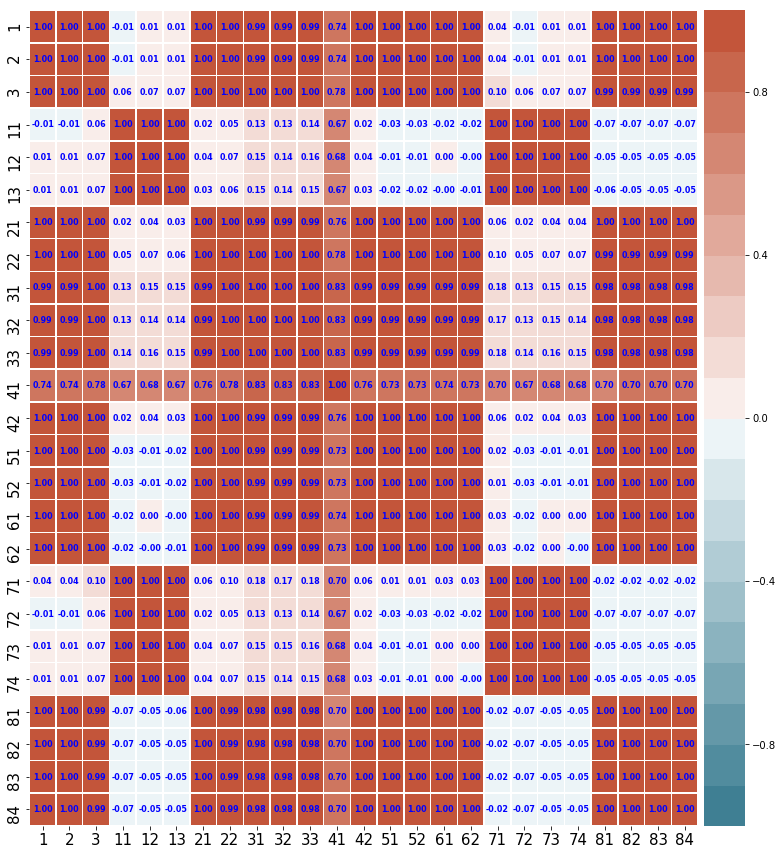

In [109]:
fig_heatmap(data_simi)

## 使用 tfidf 计算

In [140]:
corpus_simi_matrix = similarities.MatrixSimilarity(corpus_tfidf)
doc_simi_list = []
for doc in data_list:
    doc_pre = pre.handle_contents([doc])
    doc_vec = dictionary.doc2bow(doc_pre[0].split(' '))
    doc_tfidf = tfidf_model[doc_vec]
    doc_simi = corpus_simi_matrix[doc_tfidf]
    doc_simi_list.append(list(doc_simi))

In [141]:
col_ind = data['id'].tolist()
data_simi = pd.DataFrame(doc_simi_list, index = col_ind, columns = col_ind)
data_simi

,1,2,3,11,12,13,21,22,31,32,...,61,62,71,72,73,74,81,82,83,84
1,0.999947,0.999947,0.026190,0.005970,0.008542,0.004896,0.090692,0.102831,0.124127,0.156054,...,0.036167,0.109915,0.007236,0.005970,0.006401,0.007502,0.002456,0.003327,0.003327,0.010269
2,0.999947,0.999947,0.026190,0.005970,0.008542,0.004896,0.090692,0.102831,0.124127,0.156054,...,0.036167,0.109915,0.007236,0.005970,0.006401,0.007502,0.002456,0.003327,0.003327,0.010269
3,0.026192,0.026192,1.000000,0.004799,0.006005,0.000895,0.031748,0.037208,0.012285,0.011817,...,0.014514,0.010853,0.002909,0.004799,0.002374,0.001371,0.001068,0.009133,0.009133,0.003749
11,0.005802,0.005802,0.004799,1.000000,0.980610,0.590748,0.004158,0.011340,0.055688,0.052428,...,0.008766,0.008012,0.726169,1.000000,0.809437,0.905144,0.001737,0.002676,0.002676,0.000000
12,0.008375,0.008375,0.006005,0.980610,1.000000,0.575694,0.017405,0.035547,0.072933,0.070113,...,0.006990,0.006389,0.736252,0.980610,0.802122,0.882078,0.001728,0.002661,0.002661,0.000000
13,0.004753,0.004753,0.000895,0.590748,0.575694,1.000000,0.003537,0.017636,0.047484,0.044703,...,0.008158,0.007457,0.531611,0.590748,0.497146,0.652656,0.001832,0.002717,0.002717,0.000000
21,0.090352,0.090352,0.031748,0.004158,0.017405,0.003537,1.000000,0.718408,0.171101,0.163263,...,0.040069,0.034951,0.014530,0.004158,0.014237,0.005420,0.003528,0.004552,0.004552,0.008767
22,0.102808,0.102808,0.037209,0.011341,0.035548,0.017637,0.718436,0.998727,0.283443,0.277646,...,0.082361,0.073219,0.037647,0.011341,0.031635,0.014971,0.005205,0.009881,0.009881,0.014518
31,0.124037,0.124037,0.012285,0.055688,0.072933,0.047484,0.171101,0.283432,1.000000,0.979165,...,0.035373,0.032333,0.090358,0.055688,0.065684,0.072755,0.001216,0.001909,0.001909,0.022788
32,0.155973,0.155973,0.011817,0.052428,0.070113,0.044703,0.163263,0.277635,0.979165,1.000000,...,0.035553,0.052674,0.086941,0.052428,0.063437,0.068495,0.001539,0.002284,0.002284,0.021260


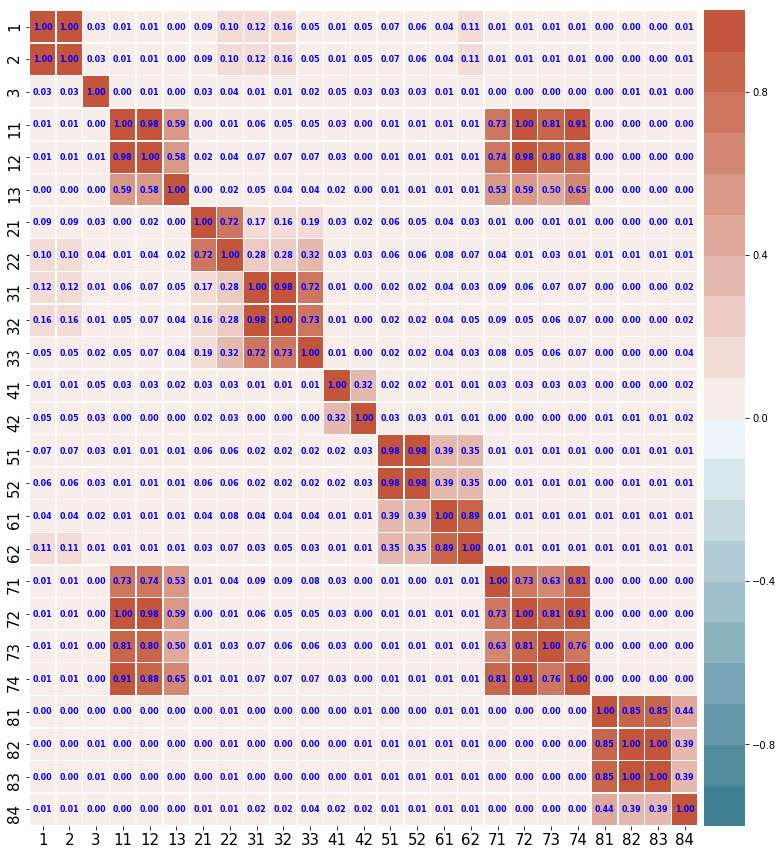

In [142]:
fig_heatmap(data_simi)

# 分类问题
- 在将文本向量化以后，就可以采用传统的分类方法了, 例如线性分类法，线性核的svm，rbf核的svm，神经网络分类等方法。

## 从gensim到sklearn的格式转换
- 一个很尴尬的问题是，gensim中的corpus数据格式，sklearn是无法识别的。即gensim中对向量的表示形式与sklearn要求的不符。 
- 在gensim中，向量是稀疏表示的。例如[(0,5),(6,3)] 意思就是说，该向量的第0个元素值为5，第6个元素值为3，其他为0.但是这种表示方式sklearn是无法识别的。
- sklearn的输入一般是与numpy或者scipy配套的。如果是密集矩阵，就需要输入numpy.array格式的； 如果是稀疏矩阵，则需要输入scipy.sparse.csr_matrix.由于后者可以转化成前者，而且gensim中向量本身就是稀疏表示，所以这边只讲如何将gensim中的corpus格式转化成csr_matrix.

- 去scipy的官网去找相关文档，可以看到csr_matrix的构造有如下几种方法。
第一种是由现有的密集矩阵来构建稀疏矩阵，第二种不是很清楚，第三种构建一个空矩阵。
第四种和第五种符合我们的要求。其中第四种最为直观，构建三个数组，分别存储每个元素的行，列和数值即可。 
官网给出的示例代码如下，还是比较直观的。

In [114]:
row = np.array([0, 0, 1, 2, 2, 2])
col = np.array([0, 2, 2, 0, 1, 2])
data = np.array([1, 2, 3, 4, 5, 6])
print(csr_matrix((data, (row, col)), shape=(3, 3)).toarray())

[[1 0 2]
 [0 0 3]
 [4 5 6]]


In [ ]:
data = []
rows = []
cols = []
line_count = 0
for line in lsi_corpus_total:  # lsi_corpus_total 是之前由gensim生成的lsi向量
    for elem in line:
        rows.append(line_count)
        cols.append(elem[0])
        data.append(elem[1])
    line_count += 1
lsi_sparse_matrix = csr_matrix((data,(rows,cols))) # 稀疏向量
lsi_matrix = lsi_sparse_matrix.toarray()  # 密集向量

# 应用

使用 tf-idf 来进行文本向量化，
使用卡方校验(chi-square)来降低向量维度，
使用liblinear(采用线性核的svm) 来进行分类。

In [ ]:
使用lsi (latent semantic analysis, 隐性语义分析) 来进行向量化， 不需要降维， 因为可以直接指定维度， 
然后使用线性核svm进行分类。
lsi的部分主要使用gensim来进行， 分类主要由sklearn来完成。